1. What is the disparity in the monetary amounts used across various transaction classes?
2. Are there specific time frames in which fraudulent transactions tend to occur more frequently?

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")


data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis - EDA

In [20]:
pd.set_option("display.float", "{:.2f}".format)

data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [21]:
data.isnull().sum().sum()

0

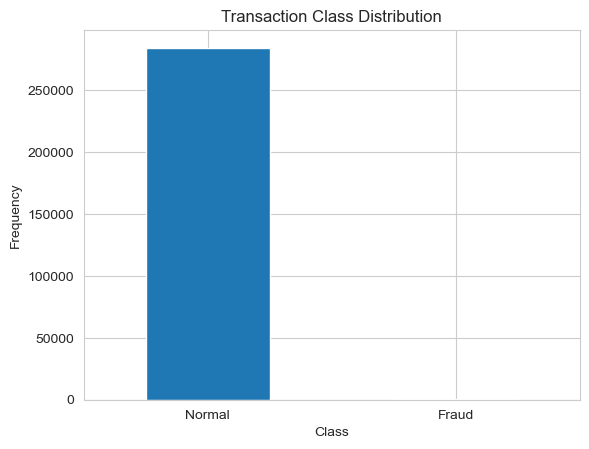

In [22]:
# Work with non-transformed variables: Time, Amount, Class (1:fraud, 0:not_fraud)

LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [23]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [24]:
# Determine the number of fraud and valid transactions in the entire dataset

fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


In [26]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,492.00,284315.00
mean,122.21,88.29
std,256.68,250.11
min,0.00,0.00
25%,1.00,5.65
50%,9.25,22.00
75%,105.89,77.05
max,2125.87,25691.16


In [27]:
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,492.00,284315.00
mean,80746.81,94838.20
std,47835.37,47484.02
min,406.00,0.00
25%,41241.50,54230.00
50%,75568.50,84711.00
75%,128483.00,139333.00
max,170348.00,172792.00


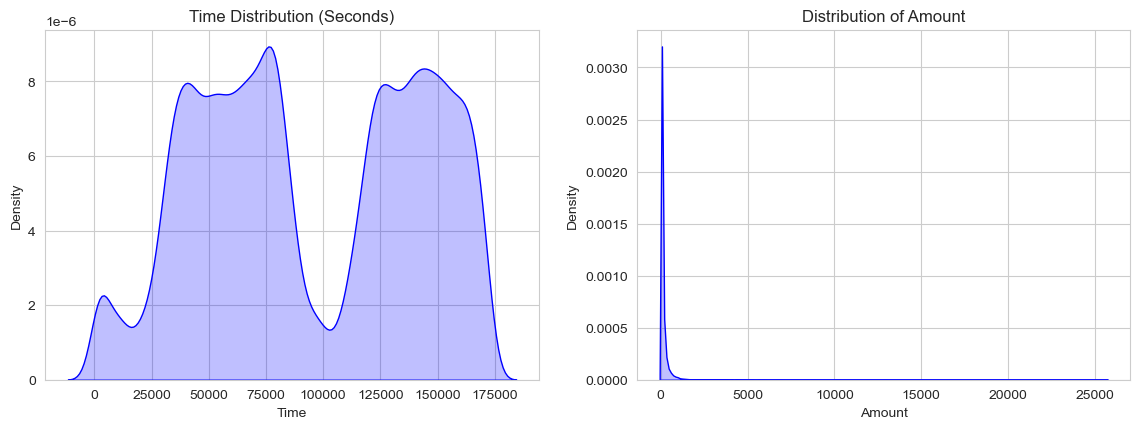

In [30]:
# plot the time feature
plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')
sns.kdeplot(data['Time'], fill = 'true', color='blue');

# plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.kdeplot(data['Amount'],fill = 'true', color='blue');

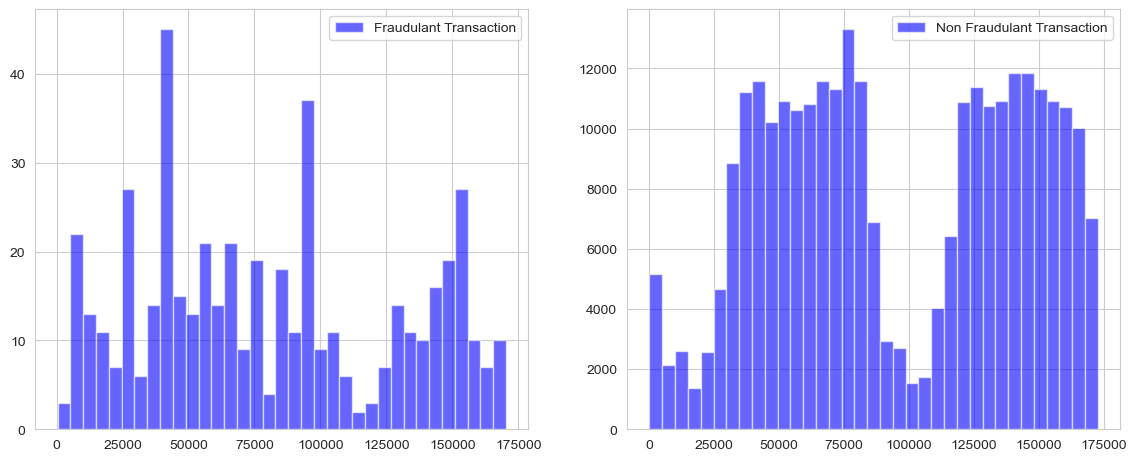

In [31]:
# data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6)
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(
  bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction"
)
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(
  bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction"
)
plt.legend()

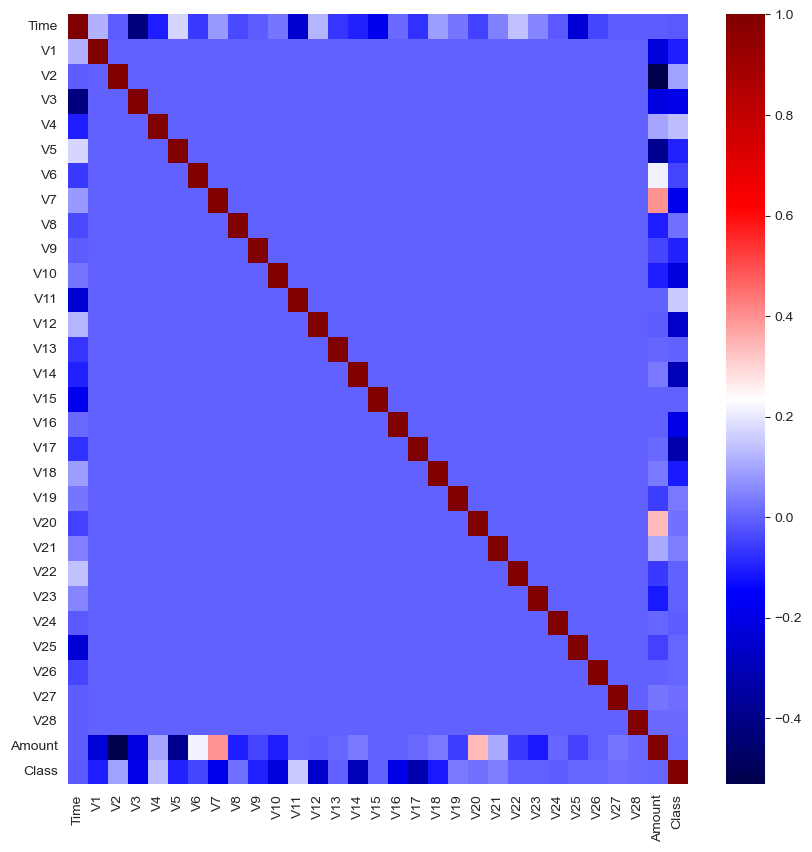

In [32]:
# heatmap to find any high correlations

plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), cmap="seismic")
plt.show();

## Data Pre-processing

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = data.drop('Class', axis=1)
y = data.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.0017994745785028623
Non-Fraudulant transaction weight: 0.9982005254214972


In [35]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159491, 30), y_train: (159491,)
_______________________________________________________
VALIDATION: X_validate: (39873, 30), y_validate: (39873,)
__________________________________________________
TESTING: X_test: (85443, 30), y_test: (85443,)


In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")

## Model Building

## Artificial Neural Networks(ANNs)

In [39]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [40]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=2048, 
    epochs=300, 
#     class_weight=class_weight,
    callbacks=callbacks,
)
score = model.evaluate(X_test, y_test)
print(score)

Epoch 1/300
78/78 [==============================] - 5s 47ms/step - loss: 0.8067 - fn: 106.0000 - fp: 75059.0000 - tn: 84145.0000 - tp: 181.0000 - precision: 0.0024 - recall: 0.6307 - val_loss: 0.7158 - val_fn: 3.0000 - val_fp: 21828.0000 - val_tn: 17976.0000 - val_tp: 66.0000 - val_precision: 0.0030 - val_recall: 0.9565
Epoch 2/300
78/78 [==============================] - 3s 43ms/step - loss: 0.6929 - fn: 49.0000 - fp: 63006.0000 - tn: 96198.0000 - tp: 238.0000 - precision: 0.0038 - recall: 0.8293 - val_loss: 0.6231 - val_fn: 8.0000 - val_fp: 5856.0000 - val_tn: 33948.0000 - val_tp: 61.0000 - val_precision: 0.0103 - val_recall: 0.8841
Epoch 3/300
78/78 [==============================] - 4s 47ms/step - loss: 0.6187 - fn: 59.0000 - fp: 50591.0000 - tn: 108613.0000 - tp: 228.0000 - precision: 0.0045 - recall: 0.7944 - val_loss: 0.5611 - val_fn: 8.0000 - val_fp: 2765.0000 - val_tn: 37039.0000 - val_tp: 61.0000 - val_precision: 0.0216 - val_recall: 0.8841
Epoch 4/300
78/78 [===============

Epoch 27/300
78/78 [==============================] - 4s 49ms/step - loss: 0.0260 - fn: 93.0000 - fp: 93.0000 - tn: 159111.0000 - tp: 194.0000 - precision: 0.6760 - recall: 0.6760 - val_loss: 0.0268 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
Epoch 28/300
78/78 [==============================] - 4s 46ms/step - loss: 0.0235 - fn: 93.0000 - fp: 99.0000 - tn: 159105.0000 - tp: 194.0000 - precision: 0.6621 - recall: 0.6760 - val_loss: 0.0257 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
Epoch 29/300
78/78 [==============================] - 4s 49ms/step - loss: 0.0243 - fn: 96.0000 - fp: 100.0000 - tn: 159104.0000 - tp: 191.0000 - precision: 0.6564 - recall: 0.6655 - val_loss: 0.0228 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
Epoch 30/300
78/78 [======================

Epoch 53/300
78/78 [==============================] - 3s 44ms/step - loss: 0.0089 - fn: 92.0000 - fp: 40.0000 - tn: 159164.0000 - tp: 195.0000 - precision: 0.8298 - recall: 0.6794 - val_loss: 0.0090 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
Epoch 54/300
78/78 [==============================] - 3s 44ms/step - loss: 0.0084 - fn: 96.0000 - fp: 46.0000 - tn: 159158.0000 - tp: 191.0000 - precision: 0.8059 - recall: 0.6655 - val_loss: 0.0088 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
Epoch 55/300
78/78 [==============================] - 3s 44ms/step - loss: 0.0082 - fn: 91.0000 - fp: 39.0000 - tn: 159165.0000 - tp: 196.0000 - precision: 0.8340 - recall: 0.6829 - val_loss: 0.0075 - val_fn: 13.0000 - val_fp: 13.0000 - val_tn: 39791.0000 - val_tp: 56.0000 - val_precision: 0.8116 - val_recall: 0.8116
Epoch 56/300
78/78 [=======================

Epoch 79/300
78/78 [==============================] - 3s 43ms/step - loss: 0.0050 - fn: 88.0000 - fp: 27.0000 - tn: 159177.0000 - tp: 199.0000 - precision: 0.8805 - recall: 0.6934 - val_loss: 0.0048 - val_fn: 16.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 53.0000 - val_precision: 0.8689 - val_recall: 0.7681
Epoch 80/300
78/78 [==============================] - 3s 43ms/step - loss: 0.0050 - fn: 91.0000 - fp: 29.0000 - tn: 159175.0000 - tp: 196.0000 - precision: 0.8711 - recall: 0.6829 - val_loss: 0.0054 - val_fn: 13.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 56.0000 - val_precision: 0.8485 - val_recall: 0.8116
Epoch 81/300
78/78 [==============================] - 3s 44ms/step - loss: 0.0040 - fn: 77.0000 - fp: 21.0000 - tn: 159183.0000 - tp: 210.0000 - precision: 0.9091 - recall: 0.7317 - val_loss: 0.0055 - val_fn: 13.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 56.0000 - val_precision: 0.8485 - val_recall: 0.8116
Epoch 82/300
78/78 [========================

Epoch 105/300
78/78 [==============================] - 3s 42ms/step - loss: 0.0033 - fn: 72.0000 - fp: 20.0000 - tn: 159184.0000 - tp: 215.0000 - precision: 0.9149 - recall: 0.7491 - val_loss: 0.0047 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
Epoch 106/300
78/78 [==============================] - 3s 43ms/step - loss: 0.0032 - fn: 77.0000 - fp: 19.0000 - tn: 159185.0000 - tp: 210.0000 - precision: 0.9170 - recall: 0.7317 - val_loss: 0.0047 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
Epoch 107/300
78/78 [==============================] - 3s 43ms/step - loss: 0.0034 - fn: 72.0000 - fp: 18.0000 - tn: 159186.0000 - tp: 215.0000 - precision: 0.9227 - recall: 0.7491 - val_loss: 0.0046 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
Epoch 108/300
78/78 [======================

Epoch 131/300
78/78 [==============================] - 3s 44ms/step - loss: 0.0025 - fn: 62.0000 - fp: 17.0000 - tn: 159187.0000 - tp: 225.0000 - precision: 0.9298 - recall: 0.7840 - val_loss: 0.0045 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
Epoch 132/300
78/78 [==============================] - 4s 49ms/step - loss: 0.0023 - fn: 65.0000 - fp: 24.0000 - tn: 159180.0000 - tp: 222.0000 - precision: 0.9024 - recall: 0.7735 - val_loss: 0.0043 - val_fn: 15.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 54.0000 - val_precision: 0.9000 - val_recall: 0.7826
Epoch 133/300
78/78 [==============================] - 5s 59ms/step - loss: 0.0024 - fn: 66.0000 - fp: 20.0000 - tn: 159184.0000 - tp: 221.0000 - precision: 0.9170 - recall: 0.7700 - val_loss: 0.0045 - val_fn: 15.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 54.0000 - val_precision: 0.9000 - val_recall: 0.7826
Epoch 134/300
78/78 [======================

Epoch 157/300
78/78 [==============================] - 4s 45ms/step - loss: 0.0024 - fn: 62.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 225.0000 - precision: 0.9375 - recall: 0.7840 - val_loss: 0.0049 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
Epoch 158/300
78/78 [==============================] - 4s 46ms/step - loss: 0.0019 - fn: 53.0000 - fp: 14.0000 - tn: 159190.0000 - tp: 234.0000 - precision: 0.9435 - recall: 0.8153 - val_loss: 0.0048 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
Epoch 159/300
78/78 [==============================] - 4s 53ms/step - loss: 0.0020 - fn: 56.0000 - fp: 17.0000 - tn: 159187.0000 - tp: 231.0000 - precision: 0.9315 - recall: 0.8049 - val_loss: 0.0046 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
Epoch 160/300
78/78 [======================

Epoch 183/300
78/78 [==============================] - 4s 46ms/step - loss: 0.0016 - fn: 48.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 239.0000 - precision: 0.9484 - recall: 0.8328 - val_loss: 0.0049 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
Epoch 184/300
78/78 [==============================] - 3s 43ms/step - loss: 0.0016 - fn: 48.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 239.0000 - precision: 0.9560 - recall: 0.8328 - val_loss: 0.0049 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
Epoch 185/300
78/78 [==============================] - 3s 43ms/step - loss: 0.0022 - fn: 56.0000 - fp: 18.0000 - tn: 159186.0000 - tp: 231.0000 - precision: 0.9277 - recall: 0.8049 - val_loss: 0.0048 - val_fn: 16.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 53.0000 - val_precision: 0.8983 - val_recall: 0.7681
Epoch 186/300
78/78 [======================

Epoch 209/300
78/78 [==============================] - 3s 43ms/step - loss: 0.0015 - fn: 49.0000 - fp: 12.0000 - tn: 159192.0000 - tp: 238.0000 - precision: 0.9520 - recall: 0.8293 - val_loss: 0.0055 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
Epoch 210/300
78/78 [==============================] - 3s 43ms/step - loss: 0.0015 - fn: 41.0000 - fp: 19.0000 - tn: 159185.0000 - tp: 246.0000 - precision: 0.9283 - recall: 0.8571 - val_loss: 0.0053 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
Epoch 211/300
78/78 [==============================] - 3s 44ms/step - loss: 0.0015 - fn: 49.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 238.0000 - precision: 0.9482 - recall: 0.8293 - val_loss: 0.0054 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
Epoch 212/300
78/78 [======================

Epoch 235/300
78/78 [==============================] - 4s 50ms/step - loss: 0.0011 - fn: 36.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 251.0000 - precision: 0.9617 - recall: 0.8746 - val_loss: 0.0056 - val_fn: 14.0000 - val_fp: 11.0000 - val_tn: 39793.0000 - val_tp: 55.0000 - val_precision: 0.8333 - val_recall: 0.7971
Epoch 236/300
78/78 [==============================] - 3s 43ms/step - loss: 0.0012 - fn: 41.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 246.0000 - precision: 0.9609 - recall: 0.8571 - val_loss: 0.0056 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
Epoch 237/300
78/78 [==============================] - 3s 44ms/step - loss: 0.0011 - fn: 36.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 251.0000 - precision: 0.9654 - recall: 0.8746 - val_loss: 0.0057 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
Epoch 238/300
78/78 [======================

Epoch 261/300
78/78 [==============================] - 4s 46ms/step - loss: 9.6755e-04 - fn: 32.0000 - fp: 12.0000 - tn: 159192.0000 - tp: 255.0000 - precision: 0.9551 - recall: 0.8885 - val_loss: 0.0059 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
Epoch 262/300
78/78 [==============================] - 4s 46ms/step - loss: 0.0011 - fn: 38.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 249.0000 - precision: 0.9651 - recall: 0.8676 - val_loss: 0.0057 - val_fn: 14.0000 - val_fp: 11.0000 - val_tn: 39793.0000 - val_tp: 55.0000 - val_precision: 0.8333 - val_recall: 0.7971
Epoch 263/300
78/78 [==============================] - 4s 45ms/step - loss: 0.0011 - fn: 35.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 252.0000 - precision: 0.9509 - recall: 0.8780 - val_loss: 0.0060 - val_fn: 13.0000 - val_fp: 13.0000 - val_tn: 39791.0000 - val_tp: 56.0000 - val_precision: 0.8116 - val_recall: 0.8116
Epoch 264/300
78/78 [=================

78/78 [==============================] - 5s 70ms/step - loss: 8.5385e-04 - fn: 29.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 258.0000 - precision: 0.9627 - recall: 0.8990 - val_loss: 0.0064 - val_fn: 13.0000 - val_fp: 11.0000 - val_tn: 39793.0000 - val_tp: 56.0000 - val_precision: 0.8358 - val_recall: 0.8116
Epoch 287/300
78/78 [==============================] - 4s 51ms/step - loss: 7.3626e-04 - fn: 28.0000 - fp: 7.0000 - tn: 159197.0000 - tp: 259.0000 - precision: 0.9737 - recall: 0.9024 - val_loss: 0.0061 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
Epoch 288/300
78/78 [==============================] - 4s 45ms/step - loss: 7.4771e-04 - fn: 29.0000 - fp: 5.0000 - tn: 159199.0000 - tp: 258.0000 - precision: 0.9810 - recall: 0.8990 - val_loss: 0.0062 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
Epoch 289/300
78/78 [=========================

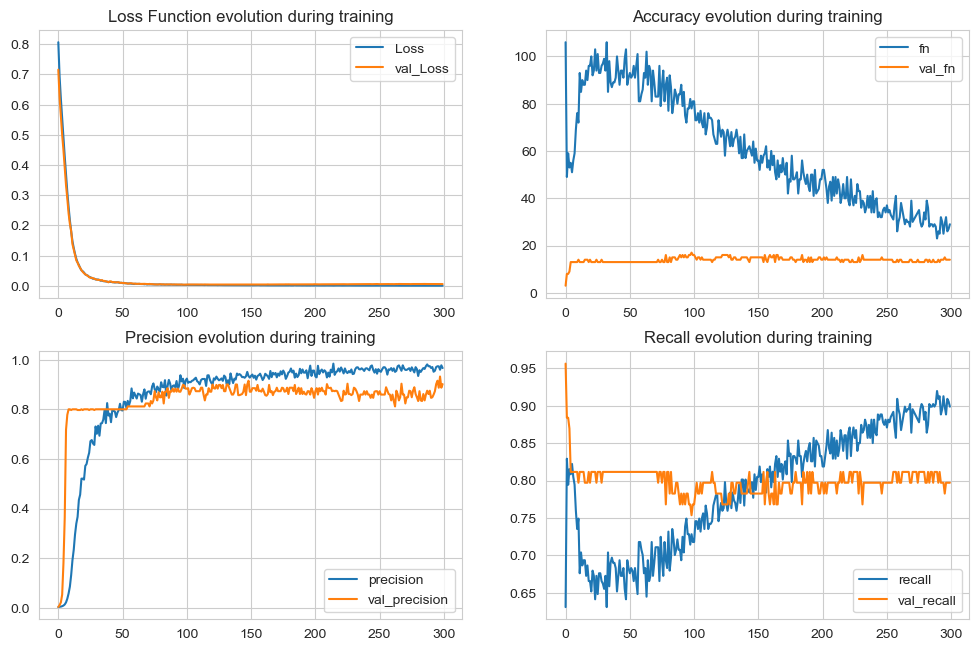

In [41]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

In [42]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

2671/2671 [==============================] - 6s 2ms/step
Train Result:
Accuracy Score: 99.99%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   0.95      1.00       0.98          1.00
f1-score       1.00   0.98      1.00       0.99          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [    13    274]]

Test Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.89      1.00       0.94          1.00
recall        1.00   0.80      1.00       0.90          1.00
f1-score      1.00   0.84      1.00       0.92          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_________

## XGBoost

In [44]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [45]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['XGBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

C:\Users\sangw\miniconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   1.00      1.00       1.00          1.00
f1-score       1.00   1.00      1.00       1.00          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     0    287]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.95      1.00       0.97          1.00
recall        1.00   0.82      1.00       0.91          1.00
f1-score      1.00   0.88      1.00       0.94          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix:

## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, oob_score=False)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['Random Forest'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   1.00      1.00       1.00          1.00
f1-score       1.00   1.00      1.00       1.00          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     1    286]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.93      1.00       0.97          1.00
recall        1.00   0.82      1.00       0.91          1.00
f1-score      1.00   0.87      1.00       0.94          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix:

## CatBoost

In [50]:
%pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [51]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train)
y_train_pred = cb_clf.predict(X_train)
y_test_pred = cb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['CatBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Learning rate set to 0.089847
0:	learn: 0.3914641	total: 165ms	remaining: 2m 44s
1:	learn: 0.2368429	total: 192ms	remaining: 1m 36s
2:	learn: 0.1341782	total: 219ms	remaining: 1m 12s
3:	learn: 0.0788514	total: 239ms	remaining: 59.5s
4:	learn: 0.0482948	total: 258ms	remaining: 51.4s
5:	learn: 0.0315326	total: 277ms	remaining: 45.8s
6:	learn: 0.0213628	total: 298ms	remaining: 42.2s
7:	learn: 0.0153604	total: 318ms	remaining: 39.4s
8:	learn: 0.0115137	total: 336ms	remaining: 36.9s
9:	learn: 0.0090128	total: 353ms	remaining: 35s
10:	learn: 0.0071550	total: 372ms	remaining: 33.5s
11:	learn: 0.0060638	total: 393ms	remaining: 32.3s
12:	learn: 0.0052453	total: 413ms	remaining: 31.3s
13:	learn: 0.0046542	total: 435ms	remaining: 30.7s
14:	learn: 0.0042229	total: 458ms	remaining: 30s
15:	learn: 0.0038780	total: 477ms	remaining: 29.3s
16:	learn: 0.0036112	total: 495ms	remaining: 28.6s
17:	learn: 0.0034152	total: 513ms	remaining: 28s
18:	learn: 0.0032510	total: 533ms	remaining: 27.5s
19:	learn: 0.0

164:	learn: 0.0012199	total: 4.13s	remaining: 20.9s
165:	learn: 0.0012135	total: 4.16s	remaining: 20.9s
166:	learn: 0.0012109	total: 4.18s	remaining: 20.8s
167:	learn: 0.0012013	total: 4.21s	remaining: 20.8s
168:	learn: 0.0011997	total: 4.23s	remaining: 20.8s
169:	learn: 0.0011975	total: 4.25s	remaining: 20.8s
170:	learn: 0.0011950	total: 4.28s	remaining: 20.7s
171:	learn: 0.0011937	total: 4.3s	remaining: 20.7s
172:	learn: 0.0011858	total: 4.32s	remaining: 20.7s
173:	learn: 0.0011818	total: 4.34s	remaining: 20.6s
174:	learn: 0.0011801	total: 4.36s	remaining: 20.6s
175:	learn: 0.0011772	total: 4.39s	remaining: 20.5s
176:	learn: 0.0011728	total: 4.41s	remaining: 20.5s
177:	learn: 0.0011700	total: 4.43s	remaining: 20.5s
178:	learn: 0.0011608	total: 4.46s	remaining: 20.4s
179:	learn: 0.0011524	total: 4.48s	remaining: 20.4s
180:	learn: 0.0011503	total: 4.49s	remaining: 20.3s
181:	learn: 0.0011484	total: 4.52s	remaining: 20.3s
182:	learn: 0.0011466	total: 4.54s	remaining: 20.3s
183:	learn: 0

326:	learn: 0.0007479	total: 7.68s	remaining: 15.8s
327:	learn: 0.0007457	total: 7.71s	remaining: 15.8s
328:	learn: 0.0007442	total: 7.74s	remaining: 15.8s
329:	learn: 0.0007434	total: 7.75s	remaining: 15.7s
330:	learn: 0.0007414	total: 7.78s	remaining: 15.7s
331:	learn: 0.0007400	total: 7.8s	remaining: 15.7s
332:	learn: 0.0007382	total: 7.82s	remaining: 15.7s
333:	learn: 0.0007363	total: 7.85s	remaining: 15.6s
334:	learn: 0.0007345	total: 7.87s	remaining: 15.6s
335:	learn: 0.0007334	total: 7.89s	remaining: 15.6s
336:	learn: 0.0007317	total: 7.92s	remaining: 15.6s
337:	learn: 0.0007300	total: 7.95s	remaining: 15.6s
338:	learn: 0.0007283	total: 7.97s	remaining: 15.5s
339:	learn: 0.0007252	total: 8s	remaining: 15.5s
340:	learn: 0.0007233	total: 8.03s	remaining: 15.5s
341:	learn: 0.0007216	total: 8.07s	remaining: 15.5s
342:	learn: 0.0007201	total: 8.1s	remaining: 15.5s
343:	learn: 0.0007194	total: 8.14s	remaining: 15.5s
344:	learn: 0.0007166	total: 8.16s	remaining: 15.5s
345:	learn: 0.000

494:	learn: 0.0004322	total: 11.4s	remaining: 11.6s
495:	learn: 0.0004305	total: 11.4s	remaining: 11.6s
496:	learn: 0.0004299	total: 11.4s	remaining: 11.5s
497:	learn: 0.0004268	total: 11.4s	remaining: 11.5s
498:	learn: 0.0004259	total: 11.4s	remaining: 11.5s
499:	learn: 0.0004204	total: 11.5s	remaining: 11.5s
500:	learn: 0.0004202	total: 11.5s	remaining: 11.4s
501:	learn: 0.0004199	total: 11.5s	remaining: 11.4s
502:	learn: 0.0004191	total: 11.5s	remaining: 11.4s
503:	learn: 0.0004168	total: 11.5s	remaining: 11.4s
504:	learn: 0.0004146	total: 11.6s	remaining: 11.3s
505:	learn: 0.0004143	total: 11.6s	remaining: 11.3s
506:	learn: 0.0004141	total: 11.6s	remaining: 11.3s
507:	learn: 0.0004126	total: 11.7s	remaining: 11.3s
508:	learn: 0.0004103	total: 11.7s	remaining: 11.3s
509:	learn: 0.0004100	total: 11.7s	remaining: 11.2s
510:	learn: 0.0004087	total: 11.7s	remaining: 11.2s
511:	learn: 0.0004074	total: 11.7s	remaining: 11.2s
512:	learn: 0.0004063	total: 11.7s	remaining: 11.2s
513:	learn: 

654:	learn: 0.0002652	total: 14.9s	remaining: 7.84s
655:	learn: 0.0002649	total: 14.9s	remaining: 7.82s
656:	learn: 0.0002645	total: 14.9s	remaining: 7.8s
657:	learn: 0.0002644	total: 15s	remaining: 7.78s
658:	learn: 0.0002642	total: 15s	remaining: 7.75s
659:	learn: 0.0002634	total: 15s	remaining: 7.73s
660:	learn: 0.0002630	total: 15s	remaining: 7.71s
661:	learn: 0.0002627	total: 15.1s	remaining: 7.68s
662:	learn: 0.0002624	total: 15.1s	remaining: 7.67s
663:	learn: 0.0002623	total: 15.1s	remaining: 7.64s
664:	learn: 0.0002606	total: 15.1s	remaining: 7.63s
665:	learn: 0.0002599	total: 15.2s	remaining: 7.6s
666:	learn: 0.0002596	total: 15.2s	remaining: 7.58s
667:	learn: 0.0002594	total: 15.2s	remaining: 7.56s
668:	learn: 0.0002588	total: 15.2s	remaining: 7.54s
669:	learn: 0.0002586	total: 15.3s	remaining: 7.51s
670:	learn: 0.0002585	total: 15.3s	remaining: 7.49s
671:	learn: 0.0002582	total: 15.3s	remaining: 7.47s
672:	learn: 0.0002580	total: 15.3s	remaining: 7.44s
673:	learn: 0.0002577	

821:	learn: 0.0001708	total: 18.5s	remaining: 4s
822:	learn: 0.0001707	total: 18.5s	remaining: 3.98s
823:	learn: 0.0001705	total: 18.5s	remaining: 3.96s
824:	learn: 0.0001703	total: 18.5s	remaining: 3.93s
825:	learn: 0.0001697	total: 18.6s	remaining: 3.91s
826:	learn: 0.0001696	total: 18.6s	remaining: 3.89s
827:	learn: 0.0001688	total: 18.6s	remaining: 3.87s
828:	learn: 0.0001687	total: 18.6s	remaining: 3.84s
829:	learn: 0.0001686	total: 18.7s	remaining: 3.82s
830:	learn: 0.0001685	total: 18.7s	remaining: 3.8s
831:	learn: 0.0001684	total: 18.7s	remaining: 3.78s
832:	learn: 0.0001680	total: 18.7s	remaining: 3.76s
833:	learn: 0.0001668	total: 18.8s	remaining: 3.73s
834:	learn: 0.0001667	total: 18.8s	remaining: 3.71s
835:	learn: 0.0001663	total: 18.8s	remaining: 3.69s
836:	learn: 0.0001663	total: 18.8s	remaining: 3.67s
837:	learn: 0.0001659	total: 18.9s	remaining: 3.65s
838:	learn: 0.0001657	total: 18.9s	remaining: 3.62s
839:	learn: 0.0001655	total: 18.9s	remaining: 3.6s
840:	learn: 0.000

989:	learn: 0.0001255	total: 22.4s	remaining: 226ms
990:	learn: 0.0001247	total: 22.4s	remaining: 204ms
991:	learn: 0.0001247	total: 22.4s	remaining: 181ms
992:	learn: 0.0001242	total: 22.5s	remaining: 158ms
993:	learn: 0.0001242	total: 22.5s	remaining: 136ms
994:	learn: 0.0001237	total: 22.5s	remaining: 113ms
995:	learn: 0.0001234	total: 22.5s	remaining: 90.5ms
996:	learn: 0.0001228	total: 22.6s	remaining: 67.9ms
997:	learn: 0.0001219	total: 22.6s	remaining: 45.3ms
998:	learn: 0.0001216	total: 22.6s	remaining: 22.6ms
999:	learn: 0.0001216	total: 22.6s	remaining: 0us
Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   1.00      1.00       1.00          1.00
f1-score       1.00   1.00      1.00       1.00          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______

In [52]:
%pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [53]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = lgbm_clf.predict(X_train)
y_test_pred = lgbm_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['LigthGBM'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 99.58%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   0.23      1.00       0.62          1.00
recall         1.00   0.59      1.00       0.79          1.00
f1-score       1.00   0.33      1.00       0.67          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[158652    552]
 [   119    168]]

Test Result:
Accuracy Score: 99.50%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.16      0.99       0.58          1.00
recall        1.00   0.53      0.99       0.76          0.99
f1-score      1.00   0.25      0.99       0.62          1.00
support   85307.00 136.00      0.99   85443.00      85443.00
_______________________________________________
Confusion Matrix: 

## Model Comparison

<AxesSubplot:>

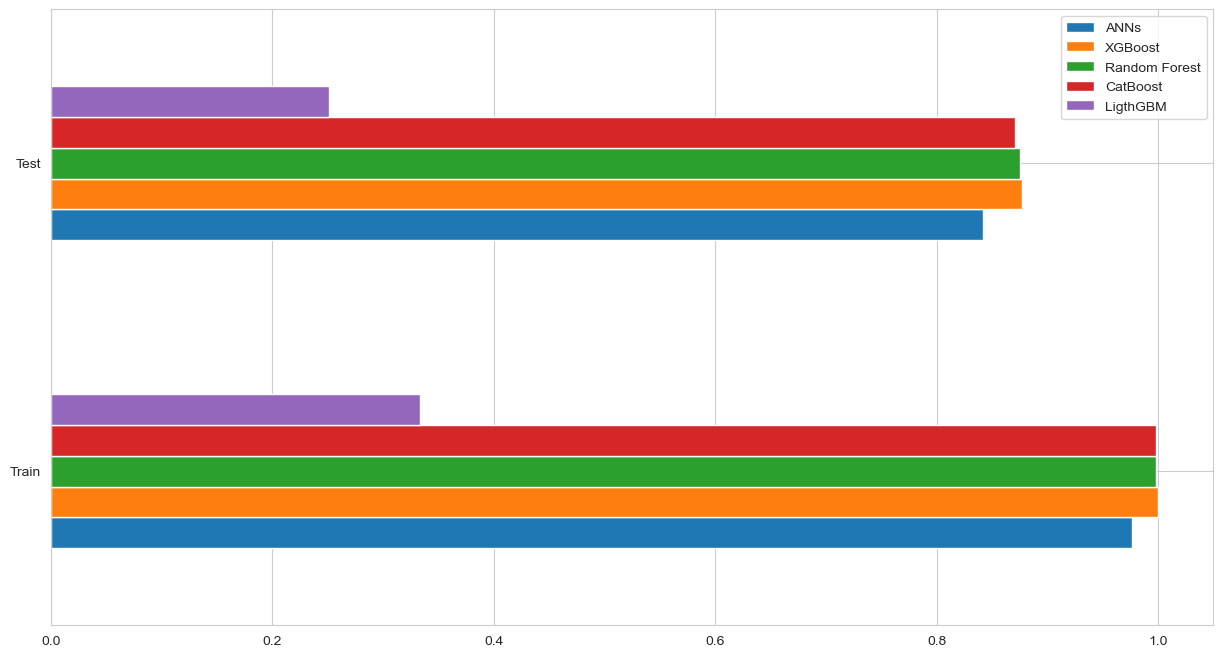

In [55]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))

## Conclusion:

I acquired the knowledge of building a credit card fraud detection model using machine learning techniques.
My methodology involved employing a diverse range of ML algorithms, such as Artificial Neural Networks (ANNs) and Tree-based models. After completing the training phase, I evaluated the performance on a validation dataset consisting of 85,443 transactions. Among all the models tested, XGBoost emerged as the superior performer.

- Correctly identifying 111 of them as fraudulent
- Missing 9 fraudulent transactions
- At the cost of incorrectly flagging 25 legitimate transactions